<a href="https://colab.research.google.com/github/Krishan-s8/Applied-AI---Brain-Tumour-Prediction/blob/main/CourseWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob


Count the number of images in the respective classes 0 - Brain Tumor and 1 - Healthy

In [ ]:
!unzip /content/archive.zip

Archive:  /content/archive.zip
  inflating: brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: brain_tumor_dataset/no/23 no.jpg  
  inflating: brain_tumor_dataset/no/24 no.jpg  
  inflating: brain_tumor_dataset/no/25 no.jpg  
  inflating: brain_tumor_dataset/no/26 no.jpg  
  inflating: brain_tumor_dataset/no/27 no.jpg  
  inflating: brain_tumor_dataset/no/28 no.jpg  
  inflati

In [ ]:
# prompt: delete folder

def delete_folder(folder_path):
  """Deletes a folder and its contents.

  Args:
    folder_path: The path to the folder to delete.
  """
  try:
    shutil.rmtree(folder_path)
    print(f"Folder '{folder_path}' deleted successfully.")
  except FileNotFoundError:
    print(f"Folder '{folder_path}' not found.")
  except OSError as e:
    print(f"Error deleting folder '{folder_path}': {e}")

# Example usage:
folder_to_delete = '/content/yes'  # Replace with the actual path
delete_folder(folder_to_delete)

Folder '/content/yes' deleted successfully.


In [ ]:
ROOT_DIR = "/content/brain_tumor_dataset"
number_of_images = {}
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))
number_of_images.items()


dict_items([('yes', 155), ('no', 98)])

We will split the data such that

*   70% for train Data
*   15% for Validation
*   15% for testing









In [ ]:
def dataFolder(p, split):

  #we create a training folder

  if not os.path.exists("./"+p):
    os.makedirs("./"+p)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./"+p+"/"+dir)
      for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir)),
                                  size = (math.floor(split*number_of_images[dir])-5),
                                  replace = False):
        O = O = os.path.join(ROOT_DIR, dir, img)
        D = os.path.join("./"+p, dir)
        shutil.copy(O, D)
        os.remove(O)

  else:
    print(f"{p} folder exists")




In [ ]:
dataFolder("train", 0.7)

In [ ]:
dataFolder("val", 0.15)

In [ ]:
dataFolder("test", 0.15)

Model Building

In [ ]:
from  tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras

In [ ]:

# CNN Model

model = Sequential()

model.add((Conv2D(filters = 16, kernel_size = (3,3), activation = "relu", input_shape = (224,224,3))))

model.add((Conv2D(filters = 36, kernel_size = (3,3), activation = "relu")))
model.add((MaxPooling2D(pool_size = (2,2))))

model.add((Conv2D(filters = 64, kernel_size = (3,3), activation = "relu")))
model.add((MaxPooling2D(pool_size = (2,2))))

model.add((Conv2D(filters = 128, kernel_size = (3,3), activation = "relu")))
model.add((MaxPooling2D(pool_size = (2,2))))

model.add(Dropout(rate = 0.25))

model.add(Flatten())

model.add(Dense(units = 64, activation = "relu"))
model.add(Dropout(rate = 0.25))

model.add(Dense(units = 1, activation = "sigmoid"))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 36)        │           5,220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 36)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 64)        │          20,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       5,537,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,638,245 (21.51 MB)

 Trainable params: 5,638,245 (21.51 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

Preparing our Data from a data generator

In [ ]:
def preprocessingImages1(path):
  """
  input: Path
  output: Pre processed images
  """
  image_data = ImageDataGenerator(
      rescale = 1./255,
      shear_range = 0.2,
      zoom_range = 0.2,
      horizontal_flip = True
  )
  image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size = 32, class_mode = "binary")
  return image




In [ ]:
path = "/content/train"
train_data = preprocessingImages1(path)

Found 166 images belonging to 2 classes.


In [ ]:
def preprocessingImages2(path):
  """
  input: Path
  output: Pre processed images
  """
  image_data = ImageDataGenerator(
      rescale = 1./255
  )
  image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size = 32, class_mode = "binary")
  return image

In [ ]:
path = "/content/test"
test_data = preprocessingImages2(path)


Found 27 images belonging to 2 classes.


In [ ]:
path = "/content/val"
val_data = preprocessingImages2(path)



Found 27 images belonging to 2 classes.


In [ ]:
# Early stopping and model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping

es = EarlyStopping(monitor = "val_accuracy", min_delta = 0.01, patience = 3, verbose = 1, mode ='auto' )

# model check point
# Changing the filepath to end with .keras or .h5 to fix the error.
# If you want to save the entire model (architecture + weights), use .keras
# If you want to save only the weights, use .h5
mc = ModelCheckpoint(filepath = "./best_model.keras", monitor = "val_accuracy", verbose = 1, save_best_only = True, mode = "auto")

cd = [es,mc]

Model Training

In [ ]:
hs = model.fit(train_data,
                         steps_per_epoch = 8,
                         epochs = 30,
                         verbose =1,
                         validation_data = val_data,
                         validation_steps = 16,
                         callbacks = cd)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/8 ━━━━━━━━━━━━━━━━━━━━ 12s 6s/step - accuracy: 0.4666 - loss: 0.9672

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 1: val_accuracy improved from -inf to 0.77778, saving model to ./best_model.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 44s 5s/step - accuracy: 0.4945 - loss: 0.9379 - val_accuracy: 0.7778 - val_loss: 0.5699
Epoch 2/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step - accuracy: 0.6747 - loss: 0.6415 
Epoch 2: val_accuracy did not improve from 0.77778
8/8 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.6747 - loss: 0.6396 - val_accuracy: 0.7037 - val_loss: 0.4856
Epoch 3/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 0.7625 - loss: 0.5925 
Epoch 3: val_accuracy improved from 0.77778 to 0.85185, saving model to ./best_model.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - accuracy: 0.7586 - loss: 0.5961 - val_accuracy: 0.8519 - val_loss: 0.4164
Epoch 4/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 0.6948 - loss: 0.5673 
Epoch 4: val_accuracy did not improve from 0.85185
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.6882 - loss: 0.5776 - val_accuracy: 0.7407 - val_loss: 0.4667
Epoch 5/30
6/8 ━━━━━

Model graphical represennntation

In [ ]:
h = hs.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

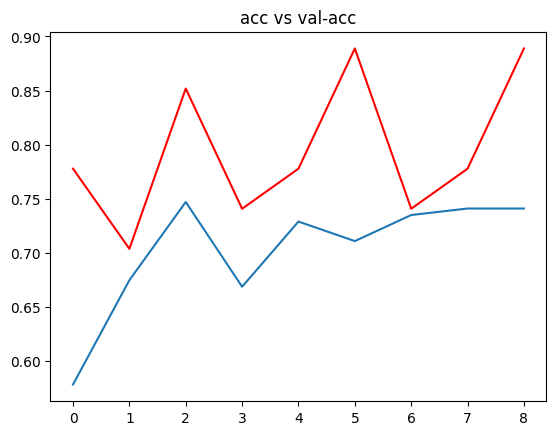

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = "red")
plt.title("acc vs val-acc")
plt.show()

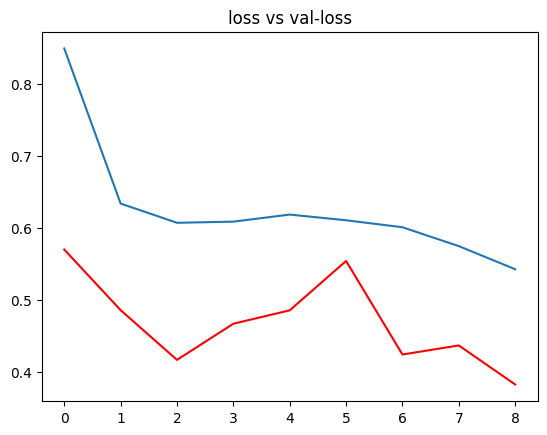

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = "red")
plt.title("loss vs val-loss")
plt.show()

In [ ]:
#Model Accuracy
from keras.models import load_model

model = load_model("/content/best_model.keras")

Model Accuracy

In [ ]:
acc = model.evaluate(test_data)[1]

print(f"the accuracy of our model is {acc * 100} %")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7407 - loss: 0.5903
the accuracy of our model is 74.0740716457367 %


In [ ]:
from keras.preprocessing.image import load_img, img_to_array

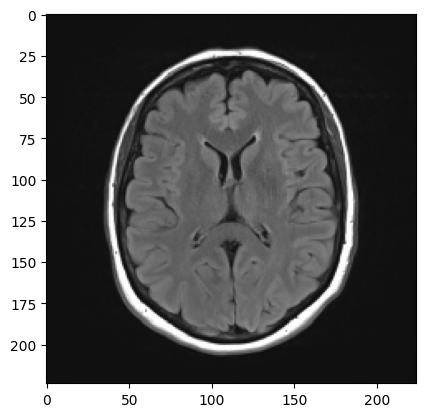

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
0.46340173
The person does not have brain tumor


In [ ]:
path = "/content/brain_tumor_dataset/no/no 97.jpg"

img = load_img(path, target_size = (224,224))
input_arr = img_to_array(img)/255

plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr, axis = 0)

pred = model.predict(input_arr)[0][0]

print(pred)

if pred > 0.5:
  print("The person has brain tumor")
else:
  print("The person does not have brain tumor")

In [ ]:
train_data.class_indices

{'no': 0, 'yes': 1}